### Import Library

In [3]:
import pandas as pd
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import InstanceHardnessThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

c:\users\adriansyah\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\adriansyah\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\adriansyah\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\adriansyah\anaconda3\envs\tf-gpu\lib\site-pack

In [4]:
df = pd.read_csv('air_bnb.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26


### Pengecekan Fitur

Mengecek banyak nya nilai unik yang ada di tiap kolom

In [101]:
col = list(df.columns)
for i in range (len(col)):
    print(col[i],':',len(set(list(df[col[i]]))))

id : 22552
name : 21874
host_id : 19180
host_name : 5998
neighbourhood_group : 12
neighbourhood : 136
latitude : 22552
longitude : 22552
room_type : 3
price : 295
minimum_nights : 102
number_of_reviews : 306
last_review : 1313
reviews_per_month : 4682
calculated_host_listings_count : 23
availability_365 : 366


In [102]:
Test_df = df

Menghilangkan kolom yang tidak diperlukan, dalam hal ini kolom yang memiliki nilai berupa string yang bukan kategorikal, dan informasi yang terlalu banyak nilai unik nya.

In [7]:
room = Test_df['room_type']
Test_df = Test_df.drop('room_type',axis=1)
encode = LabelEncoder()
encoded_room = encode.fit_transform(room)

Test_df = Test_df.drop('name',axis=1)
Test_df = Test_df.drop('host_name',axis=1)
Test_df = Test_df.drop('host_id',axis=1)
Test_df = Test_df.drop('id',axis=1)
Test_df = Test_df.drop('neighbourhood_group',axis=1)
Test_df = Test_df.drop('neighbourhood',axis=1)
Test_df = Test_df.drop('latitude',axis=1)
Test_df = Test_df.drop('longitude',axis=1)
Test_df = Test_df.drop('last_review',axis=1)

rt = pd.Series(encoded_room, name='room_type')
Test_df = Test_df.join(rt)

Test_df.fillna(0, inplace=True)

data_feature = Test_df.drop('room_type',axis=1)
label_feature = Test_df['room_type']
Test_df.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type
count,22552.000000,22552.000000,22552.000000,22552.00000,22552.000000,22552.000000,22552.000000
mean,67.143668,7.157059,17.840679,0.93845,1.918233,79.852829,0.537691
std,220.266210,40.665073,36.769624,1.43598,3.667257,119.368162,0.524254
min,0.000000,1.000000,0.000000,0.00000,1.000000,0.000000,0.000000
25%,30.000000,2.000000,1.000000,0.06000,1.000000,0.000000,0.000000
50%,45.000000,2.000000,5.000000,0.34000,1.000000,4.000000,1.000000
75%,70.000000,4.000000,16.000000,1.18000,1.000000,129.000000,1.000000
max,9000.000000,5000.000000,498.000000,36.67000,45.000000,365.000000,2.000000


Fitur yang tadi nya ada memiliki 15 kolom, sekarang sudah menjadi 7 kolom. Isi dari datanya sekarang semua sudah dalam berbentuk angka (tidak ada yang string atau kalimat). 

price                            -0.118139
minimum_nights                   -0.064755
number_of_reviews                -0.040147
reviews_per_month                 0.031733
calculated_host_listings_count   -0.017058
availability_365                 -0.079867
room_type                         1.000000
Name: room_type, dtype: float64


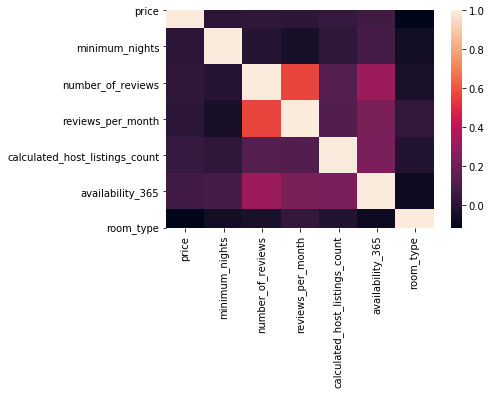

In [104]:
gabs = data_feature
gabs = gabs.join(label_feature)
ax = sns.heatmap(gabs.corr())
print(gabs.corr()['room_type'])

Jika dilihat dalam heatmap nya, ada 1 fitur yang terlihat berkorelasi, yaitu fitur number_of_reviews dan reviews_per_month. Sehingga fitur ini akan menjadi fokus utamanya. 

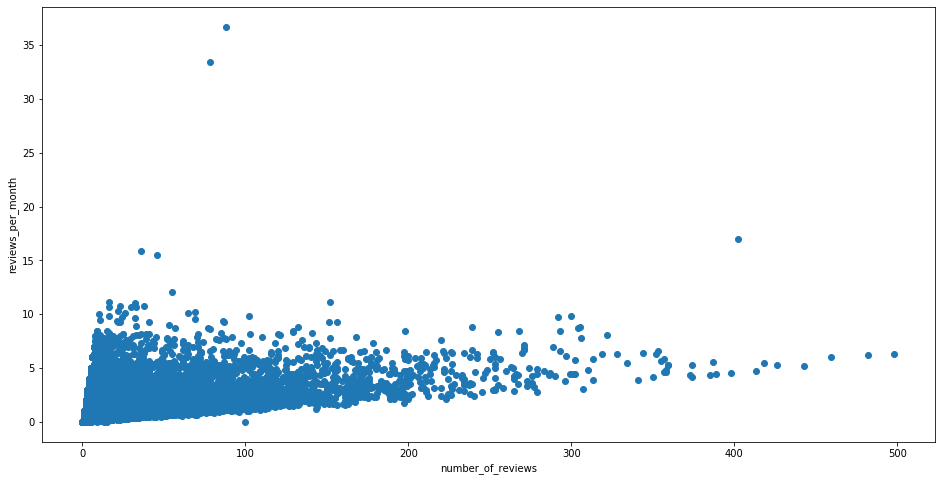

In [13]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(Test_df['number_of_reviews'], Test_df['reviews_per_month'])
ax.set_xlabel('number_of_reviews')
ax.set_ylabel('reviews_per_month')
plt.show()

Pada saat dilihat di persebaran data nya, dapat dilihat data pada fitur yang berkaitan ada yang masih outlier. Dalam kasus ini, saya mengurangi data tersebut dengan cara manual. Dengan mengambil acuan dari persebaran data diatas.

In [14]:
feat = Test_df[Test_df.number_of_reviews <= 150]
feat = feat[feat.reviews_per_month <= 5]
feat = feat[feat.reviews_per_month != 0]
feat.shape

(17802, 7)

Setelah dilakukan pengurangan data, persebaran datanya terlihat jauh lebih baik dari sebelumnya

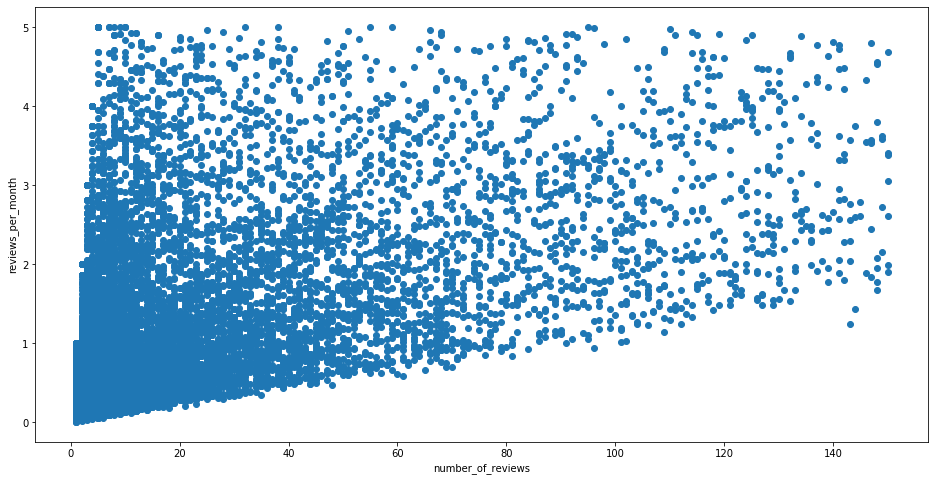

In [15]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(feat['number_of_reviews'], feat['reviews_per_month'])
ax.set_xlabel('number_of_reviews')
ax.set_ylabel('reviews_per_month')
plt.show()

In [16]:
data_feature = feat.drop('room_type', axis=1)
label_feature = feat['room_type']
data_feature.to_csv('data_feature.csv')
label_feature.to_csv('label_feature.csv')

## Classification

In [17]:
label_feature.value_counts()

1    9137
0    8454
2     211
Name: room_type, dtype: int64

Dikarenakan data imbalance, saya melakukan undersampling untuk data yang berlabel 0 dan 1

In [18]:
undersample = InstanceHardnessThreshold()
data_feature_class, label_feature_class = undersample.fit_resample(data_feature, label_feature)

In [19]:
label_feature_class.value_counts()

1    437
0    262
2    211
Name: room_type, dtype: int64

Setelah di undersampling, maka dilakukan normalisasi terhadap data

In [20]:
st = StandardScaler().fit(data_feature_class)
data_feature_class = pd.DataFrame(st.transform(data_feature_class))

data_feature_class.head()

,0,1,2,3,4,5
0,-0.020353,4.243028,0.906489,-0.224925,-0.201963,1.682505
1,0.515621,4.243028,1.607971,0.000431,0.029069,1.818629
2,0.714129,0.261192,-0.301620,-0.607051,-0.317479,2.048338
3,0.118603,4.396176,0.984431,-0.195531,-0.317479,2.175954
4,1.508164,-0.121677,1.919742,0.127806,-0.317479,1.954753


In [21]:
X_train, X_test, y_train, y_test = train_test_split(data_feature_class, label_feature_class, test_size=0.33)
print(X_train.shape, y_train.shape)
print()
print(X_test.shape, y_test.shape)

(609, 6) (609,)

(301, 6) (301,)


### Random Forest

In [22]:
rdcf = RandomForestClassifier(max_depth=50, random_state=0)
rdcf.fit(X_train,y_train)
y_pred = rdcf.predict(X_test)

print("Classification report")
print(classification_report(y_test,y_pred))

Classification report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        87
           1       0.92      0.93      0.92       143
           2       0.84      0.76      0.80        71

    accuracy                           0.91       301
   macro avg       0.90      0.90      0.90       301
weighted avg       0.91      0.91      0.91       301



### SVM

In [23]:
svm = SVC()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

print("Classification report")
print(classification_report(y_test,y_pred))

Classification report
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        87
           1       0.87      0.97      0.92       143
           2       0.81      0.62      0.70        71

    accuracy                           0.88       301
   macro avg       0.87      0.84      0.85       301
weighted avg       0.87      0.88      0.87       301



## Clustering

In [24]:
feat.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type
0,60,4,118,3.76,4,141,0
1,17,2,6,1.42,1,0,1
2,90,62,143,1.25,1,220,0
3,26,5,25,0.39,1,297,1
5,180,6,6,0.15,1,137,0


Terlihat dari heatmap dibawah, fitur yang berkorelasi adalah : [1] number_of_review - reviews_per_month dan [2] number_of_review - availability_365

price                            -0.118139
minimum_nights                   -0.064755
number_of_reviews                -0.040147
reviews_per_month                 0.031733
calculated_host_listings_count   -0.017058
availability_365                 -0.079867
room_type                         1.000000
Name: room_type, dtype: float64


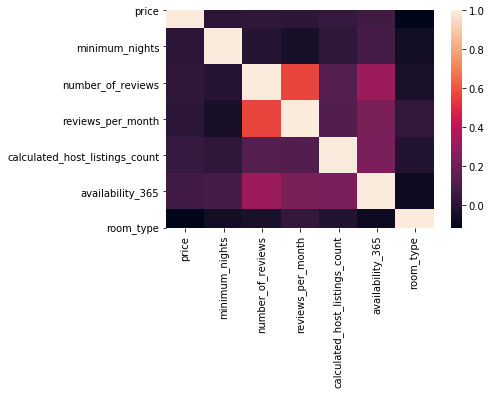

In [25]:
gabs = data_feature
gabs = gabs.join(label_feature)
ax = sns.heatmap(gabs.corr())
print(gabs.corr()['room_type'])

Untuk persebaran data nya adalah sebagai berikut.

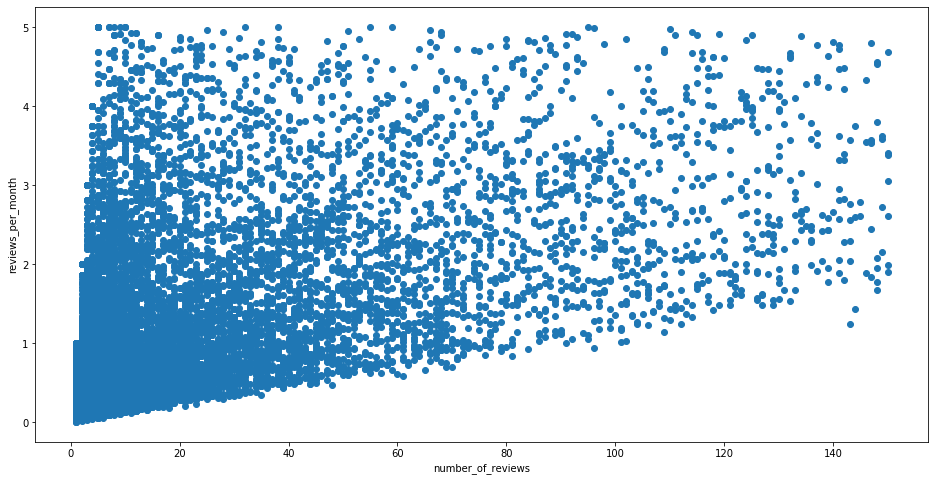

In [26]:
# Feature 1
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(feat['number_of_reviews'], feat['reviews_per_month'])
ax.set_xlabel('number_of_reviews')
ax.set_ylabel('reviews_per_month')
plt.show()

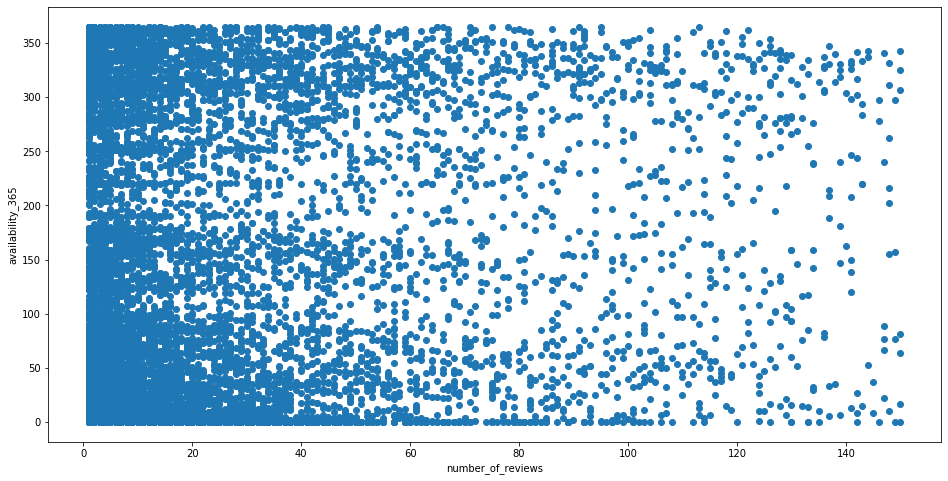

In [27]:
#Feature 2
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(feat['number_of_reviews'], feat['availability_365'])
ax.set_xlabel('number_of_reviews')
ax.set_ylabel('availability_365')
plt.show()

In [28]:
feature_1 = feat.iloc[:, [2,3]]
feature_2 = feat.iloc[:, [2,5]]
if1 = ['number_of_reviews','reviews_per_month']
if2 = ['number_of_reviews','availability_365']

### K-Means

Disini variable centro merupakan tempat penyimpanan titik centroids, pada fungsi disini centro  di initialisasi terlebih dahulu. Dilanjut kedalam perulangan for yang melakukan pemilihan sebanyak K centroid awal dari data featurenya. Setelah didapat akan mereturn variable centro.

In [29]:
def initialCentro(K, feature, df, info):
    centro =[[],[]]
    for i in range(K):
        x = df[info].values[np.random.randint(0,feature-1)]
        centro[0].append(x[0])
        centro[1].append(x[1])
        
    return centro

Pada fungsi Euclidian, variable ed merupakan tempat penyimpanan jarak Euclidian nya. Kemudian dalam for nya ini dilakukan perhitung Euclidian distance nya. Setelah selesai akan mereturn variable ed.

In [77]:
def Euclidian(K,feature,centro, df, info):
    ed = []
    for i in range(feature):
        tmp = []
        x = df[info].values[i]
        for j in range(K):
            y = ((x[0]-centro[0][j])**2+(x[1]-centro[1][j])**2)
            tmp.append(mt.sqrt(y))
        ed.append(tmp)
    return ed

Ini merupakan fungsi utama dari klusternya, for paling luar melakukan iterasi sebanyak yang diinginkan untuk mencapai hasil klustering nya. Pada variable out, merupakan variable yang digunakan untuk menyimpan data pada cluster tertentu. Kemudian dilanjutkan dengan mencari Euclidian Distance, dan variable C merupakan urutan cluster untuk setiap datanya. Masuk ke dalam for , disini variable out dimasukan data dengan penyesuaian data yang masuk ke cluster apa. Lanjut ke for berikutnya dimana menghitung rata rata titik centroids baru yang digunakan untuk iterasi selanjutnya.

In [98]:
def cluster(K, iterasi, centro, feature, df, info):
    for i in range(iterasi):
        print('iterasi -',i)
        ED = Euclidian(K,feature,centro, df, info)
        C = np.argmin(ED,axis=1)+1

        out = [[],[],[]]
        for i in range(len(df)):
            x = df[info].values[i]
            if C[i] == 1:
                out[0].append([x[0],x[1]])
            elif C[i] == 2:
                out[1].append([x[0],x[1]])
            elif C[i] == 3:
                out[2].append([x[0],x[1]])
        
        centro =[[],[]]
        for i in range(K):
            sx,sy = np.mean(out[i], axis=0)
            centro[0].append(sx)
            centro[1].append(sy)
            
    return centro, out

Pada fungsi ini, melakukan plot terhadap data dan centroid sesuai hasil dari klustering. 

In [64]:
def plot(K, centro, out):
    xa = []
    for i in range(len(out)):
        xa.append(np.array(out[i]))
    out = np.array(xa)
    centro = np.array(centro)
    color=['r','b','g']
    labels=['cluster1','cluster2','cluster3']
    for i in range(K):
        plt.scatter(out[i][:,0],out[i][:,1],c=color[i],label=labels[i])
    plt.scatter(centro[0,:],centro[1,:],s=200,c='yellow',label='Centroids')
    plt.xlabel('feature-x')
    plt.ylabel('feature-y')
    plt.legend()
    plt.show()

Kemudian setelah dilakukan pembangunan fungsi dan procedure yang dibutuhkan, maka akan dicoba clustering dengan Feature 1 dan Feature 2. 

In [93]:
# Parameter
K = 3
iterasi = 10

#### Feature 1

In [94]:
feature, dimen = feature_1.shape[0], feature_1.shape[1] 
centro = initialCentro(K, feature, feature_1, if1)
centro, output = cluster(K, iterasi, centro, feature, feature_1, if1)

iterasi - 0
iterasi - 1
iterasi - 2
iterasi - 3
iterasi - 4
iterasi - 5
iterasi - 6
iterasi - 7
iterasi - 8
iterasi - 9


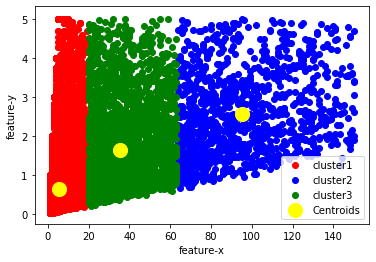

In [95]:
plot(K,centro,output)

#### Feature 2

In [96]:
feature, dimen = feature_2.shape[0], feature_2.shape[1] 
centro = initialCentro(K, feature, feature_2, if2)
centro, output = cluster(K, iterasi, centro, feature, feature_2, if2)

iterasi - 0
iterasi - 1
iterasi - 2
iterasi - 3
iterasi - 4
iterasi - 5
iterasi - 6
iterasi - 7
iterasi - 8
iterasi - 9


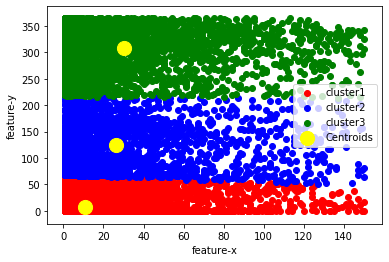

In [97]:
plot(K,centro,output)